
Players Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ilkid        3572 non-null   object 
 1   firstname    3572 non-null   object 
 2   lastname     3572 non-null   object 
 3   position     3572 non-null   object 
 4   firstseason  3572 non-null   int64  
 5   lastseason   3572 non-null   int64  
 6   h_feet       3563 non-null   float64
 7   h_inches     3563 non-null   float64
 8   weight       3557 non-null   float64
 9   college      3478 non-null   object 
 10  birthdate    3561 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 307.1+ KB
None

Missing Values:
ilkid           0
firstname       0
lastname        0
position        0
firstseason     0
lastseason      0
h_feet          9
h_inches        9
weight         15
college        94
birthdate      11
dtype: int64

Sample Data:
       ilkid 

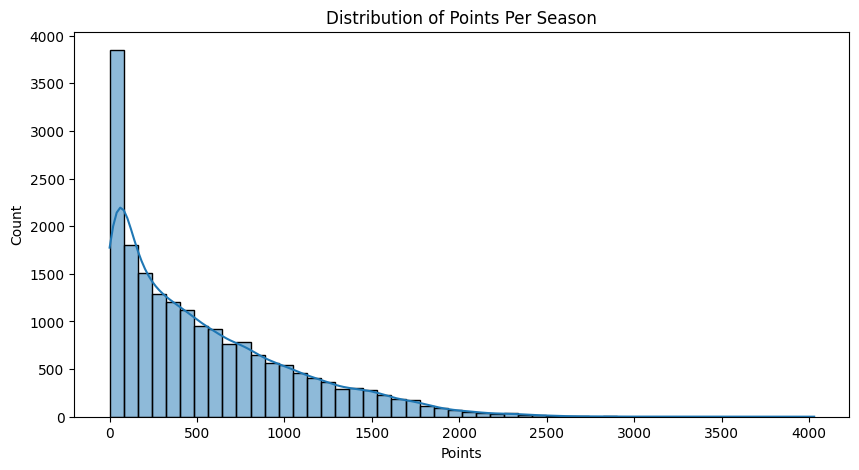

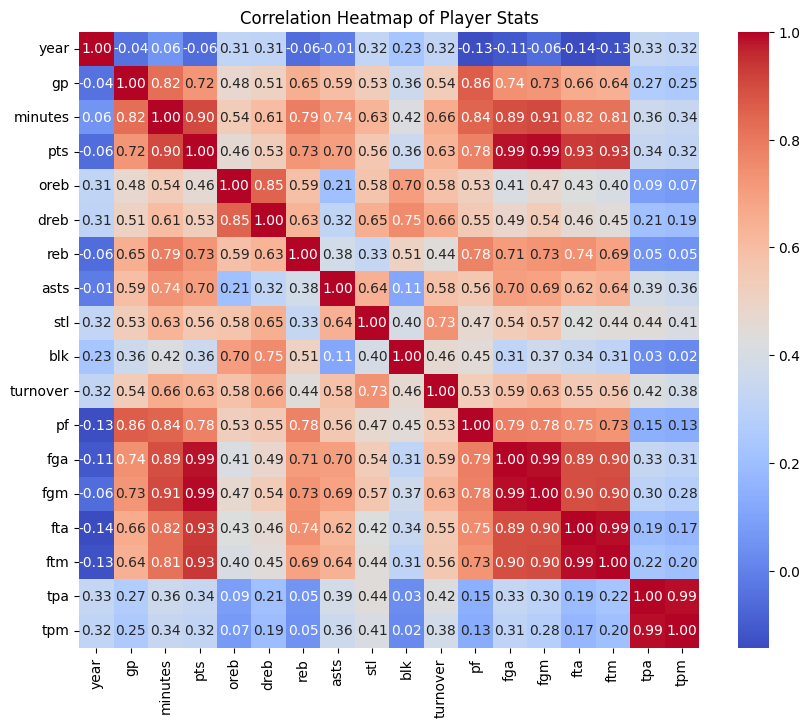

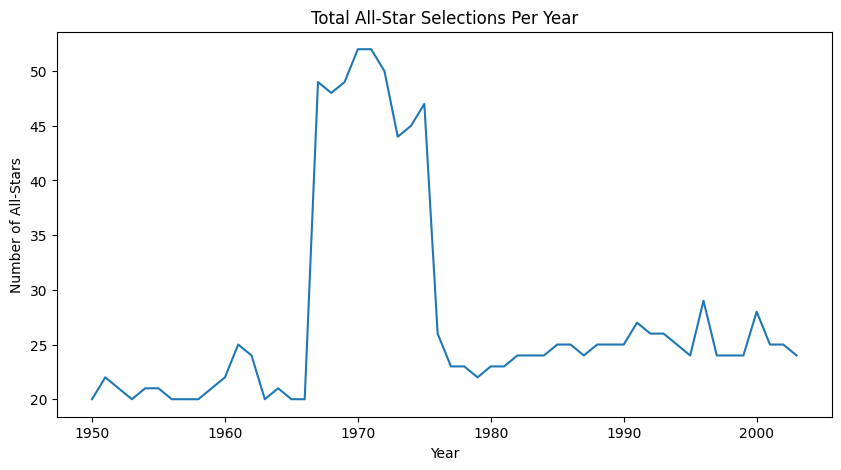

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load datasets
data_folder = os.path.join('../data/')  

# Load datasets
players = pd.read_csv(os.path.join(data_folder, 'players.csv'), encoding='latin1', on_bad_lines='skip')
regular_season = pd.read_csv(os.path.join(data_folder, 'player_regular_season.csv'), encoding='latin1', on_bad_lines='skip')
all_star = pd.read_csv(os.path.join(data_folder, 'player_allstar.csv'), encoding='latin1', on_bad_lines='skip')
draft = pd.read_csv(os.path.join(data_folder, 'draft.csv'), encoding='latin1', on_bad_lines='skip')

# Display basic info
def check_data(df, name):
    print(f"\n{name} Dataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSample Data:")
    print(df.head())

# Check each dataset
check_data(players, "Players")
check_data(regular_season, "Regular Season Stats")
check_data(all_star, "All-Star Stats")
check_data(draft, "Draft Data")

# Summary statistics
print("\nSummary Statistics for Regular Season Stats:")
print(regular_season.describe())

# Visualizations
plt.figure(figsize=(10, 5))
sns.histplot(regular_season['pts'], bins=50, kde=True)
plt.title('Distribution of Points Per Season')
plt.xlabel('Points')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_cols = regular_season.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(regular_season[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Player Stats')
plt.show()

# All-Star trends
yearly_allstars = all_star.groupby('year').size()
plt.figure(figsize=(10, 5))
yearly_allstars.plot()
plt.title('Total All-Star Selections Per Year')
plt.xlabel('Year')
plt.ylabel('Number of All-Stars')
plt.show()


In [19]:
print(regular_season.isnull().sum())
print(all_star.isnull().sum())
print(draft.isnull().sum())


ilkid          0
year           0
firstname      0
lastname       0
team           0
leag           0
gp             0
minutes        0
pts            0
oreb           0
dreb           0
reb            0
asts           0
stl            0
blk            0
turnover     294
pf             0
fga            0
fgm            0
fta            0
ftm            0
tpa            0
tpm            0
dtype: int64
ilkid            0
year             0
firstname        0
lastname         0
conference       0
leag             0
gp               0
minutes          0
pts             48
dreb          1139
oreb          1139
reb             48
asts            48
stl           1234
blk           1234
turnover      1139
pf            1092
fga             48
fgm             48
fta             48
ftm             48
tpa           1092
tpm           1092
dtype: int64
draft_year        0
draft_round       0
selection         0
team              0
firstname         0
lastname          0
ilkid          5155
draft_

In [20]:
print(draft.describe())
print(regular_season.describe())
print(all_star.describe())


        draft_year  draft_round    selection
count  8567.000000  8567.000000  8567.000000
mean   1973.376678     4.416599     7.019377
std      12.575002     4.019305     7.050424
min    1947.000000     0.000000     0.000000
25%    1967.000000     1.000000     0.000000
50%    1973.000000     3.000000     5.000000
75%    1981.000000     7.000000    12.000000
max    2004.000000    21.000000    30.000000
               year            gp       minutes           pts          oreb  \
count  19112.000000  19112.000000  19112.000000  19112.000000  19112.000000   
mean    1982.344129     52.444380   1213.219967    540.868931     49.412202   
std       15.518779     26.550149    987.185417    511.362322     67.756821   
min     1946.000000      1.000000      0.000000      0.000000      0.000000   
25%     1972.000000     30.000000    275.000000    119.000000      0.000000   
50%     1985.000000     60.000000   1053.500000    396.000000     20.000000   
75%     1995.000000     77.000000   2026.0

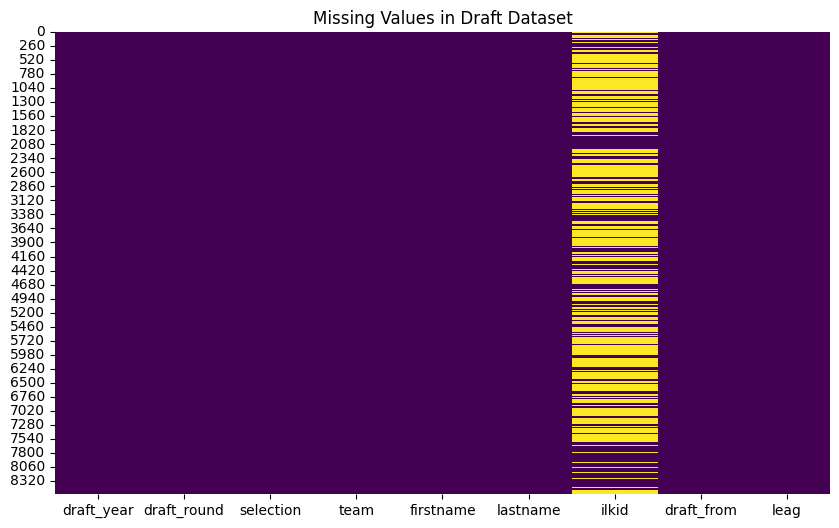

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(draft.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values in Draft Dataset")
plt.show()


C:\Users\kylef\AppData\Local\Temp\ipykernel_13688\1169089715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=draft, x='draft_year', palette='viridis')


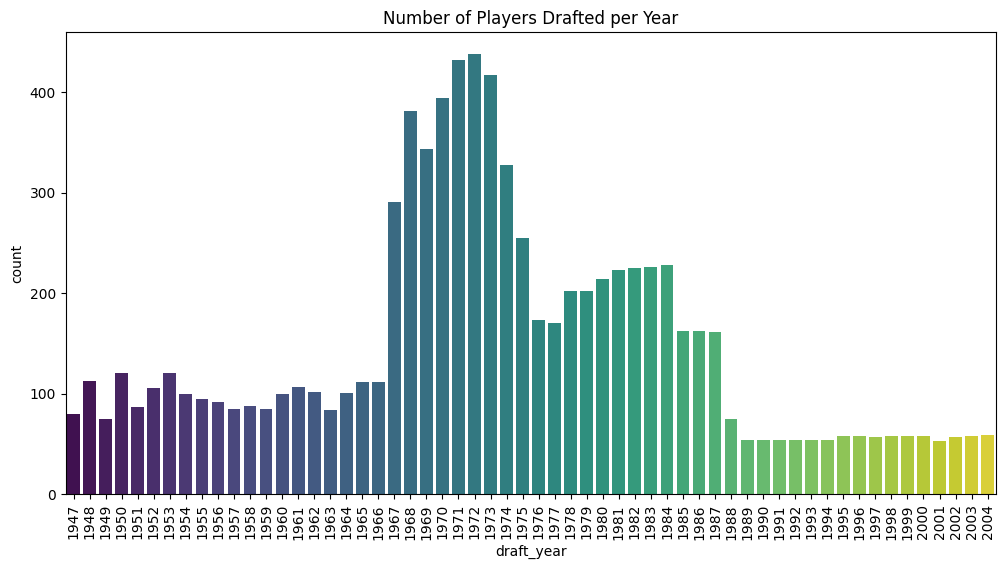

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(data=draft, x='draft_year', palette='viridis')
plt.xticks(rotation=90)
plt.title("Number of Players Drafted per Year")
plt.show()


C:\Users\kylef\AppData\Local\Temp\ipykernel_13688\2418297898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=draft['team'], order=draft['team'].value_counts().index[:10], palette="magma")


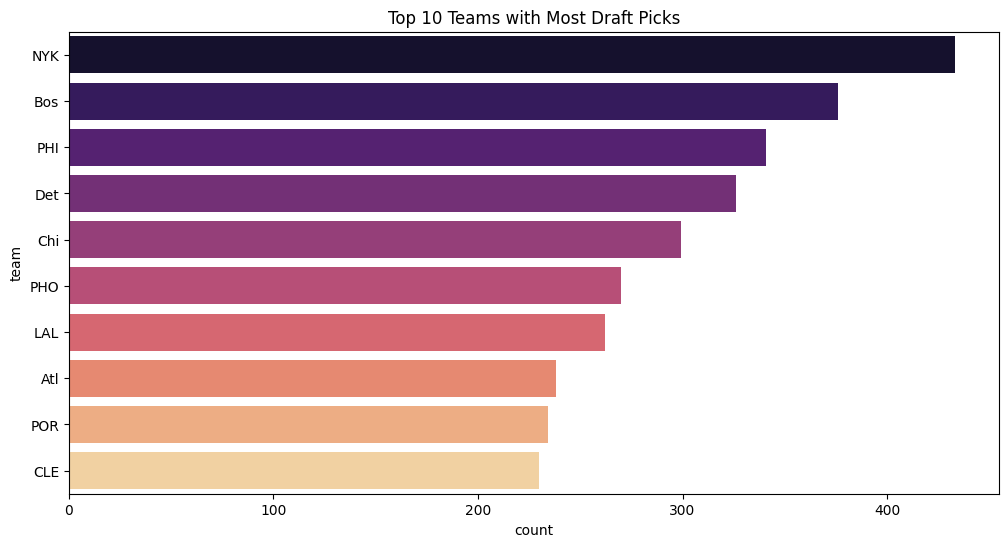

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(y=draft['team'], order=draft['team'].value_counts().index[:10], palette="magma")
plt.title("Top 10 Teams with Most Draft Picks")
plt.show()


In [24]:
# Standardize player IDs to uppercase and strip spaces
all_star["ilkid"] = all_star["ilkid"].str.upper().str.strip()
regular_season["ilkid"] = regular_season["ilkid"].str.upper().str.strip()

# Create a set of all All-Star player IDs
all_star_players = set(all_star["ilkid"])

# Add an is_all_star column to the regular season dataset
regular_season["is_all_star"] = regular_season["ilkid"].apply(lambda x: 1 if x in all_star_players else 0)

# Merge datasets (optional, if you want additional All-Star stats)
merged_df = regular_season.merge(all_star, on="ilkid", how="left", suffixes=("_reg", "_all_star"))


In [ ]:
merged_df.to_csv(os.path.join(data_folder, 'merged_data.csv'), index=False)

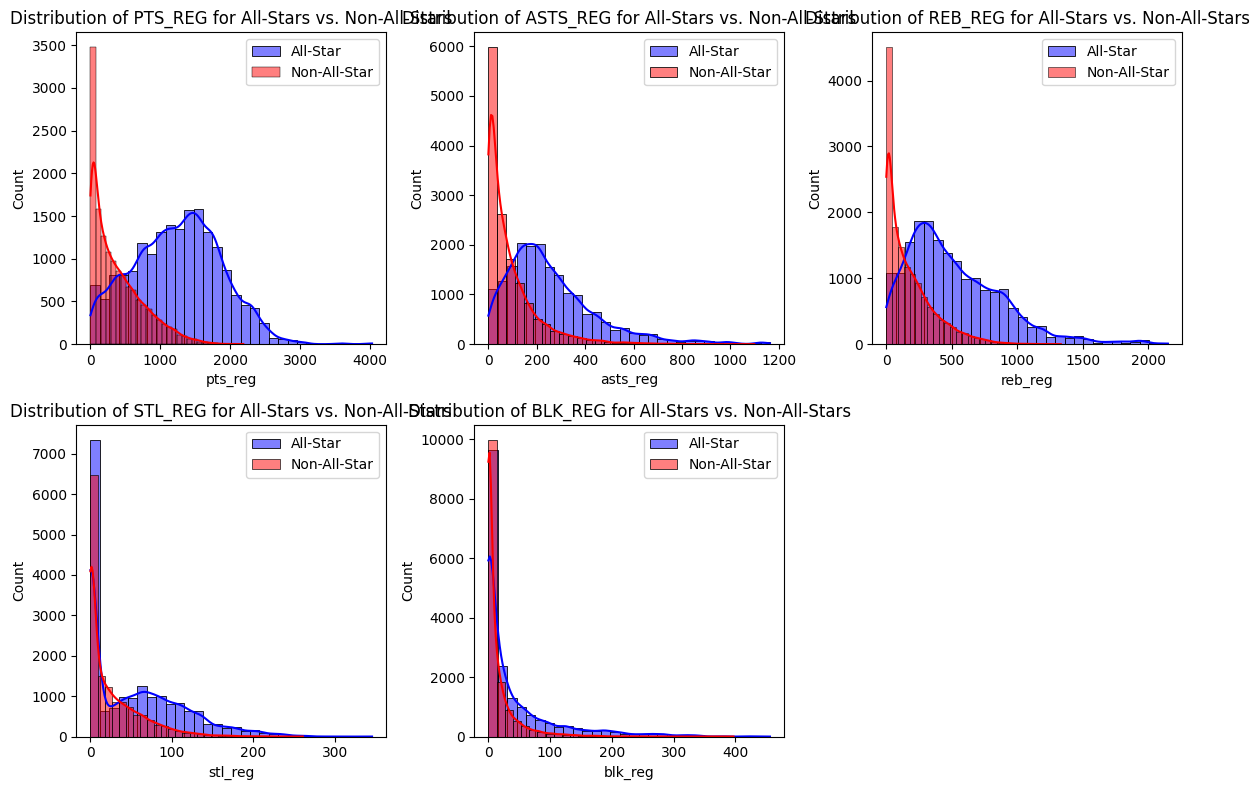

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define key stats to compare
stats_to_compare = ["pts_reg", "asts_reg", "reb_reg", "stl_reg", "blk_reg"]

# Plot histograms
plt.figure(figsize=(12, 8))
for i, stat in enumerate(stats_to_compare, 1):
    plt.subplot(2, 3, i)
    sns.histplot(merged_df[merged_df["is_all_star"] == 1][stat], color="blue", label="All-Star", kde=True, bins=30)
    sns.histplot(merged_df[merged_df["is_all_star"] == 0][stat], color="red", label="Non-All-Star", kde=True, bins=30)
    plt.legend()
    plt.title(f"Distribution of {stat.upper()} for All-Stars vs. Non-All-Stars")
plt.tight_layout()
plt.show()


C:\Users\kylef\AppData\Local\Temp\ipykernel_13688\328148209.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_df["is_all_star"], y=merged_df[stat], palette=["red", "blue"])
C:\Users\kylef\AppData\Local\Temp\ipykernel_13688\328148209.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_df["is_all_star"], y=merged_df[stat], palette=["red", "blue"])
C:\Users\kylef\AppData\Local\Temp\ipykernel_13688\328148209.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_df["is_all_star"], y=merged_df[stat], palette=["red", "blu

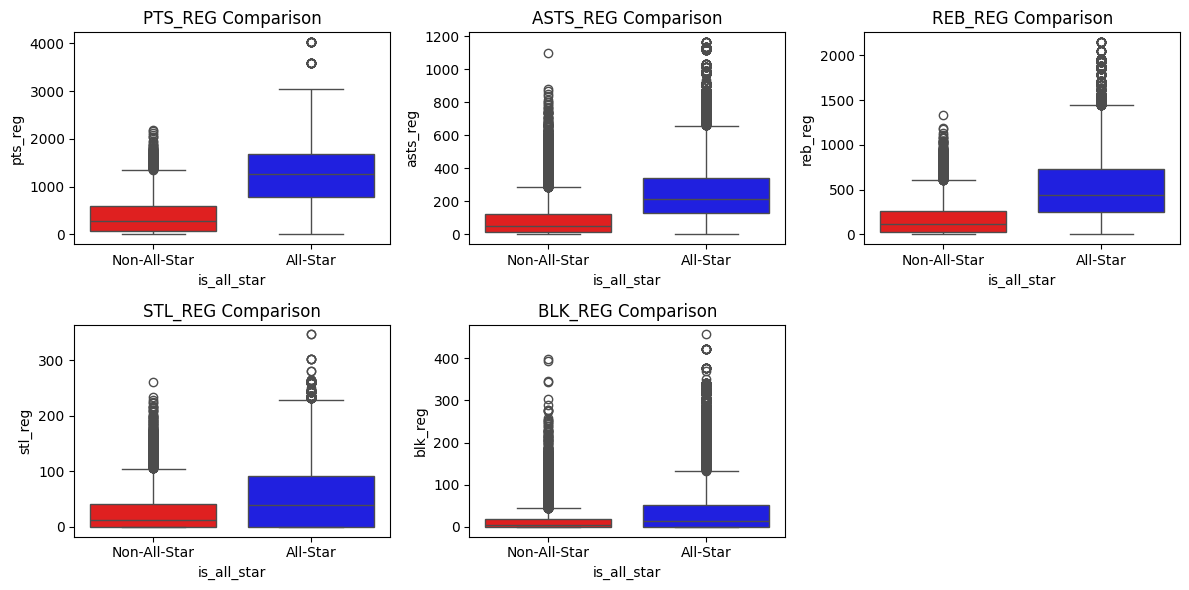

In [28]:
plt.figure(figsize=(12, 6))
for i, stat in enumerate(stats_to_compare, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=merged_df["is_all_star"], y=merged_df[stat], palette=["red", "blue"])
    plt.xticks([0, 1], ["Non-All-Star", "All-Star"])
    plt.title(f"{stat.upper()} Comparison")
plt.tight_layout()
plt.show()


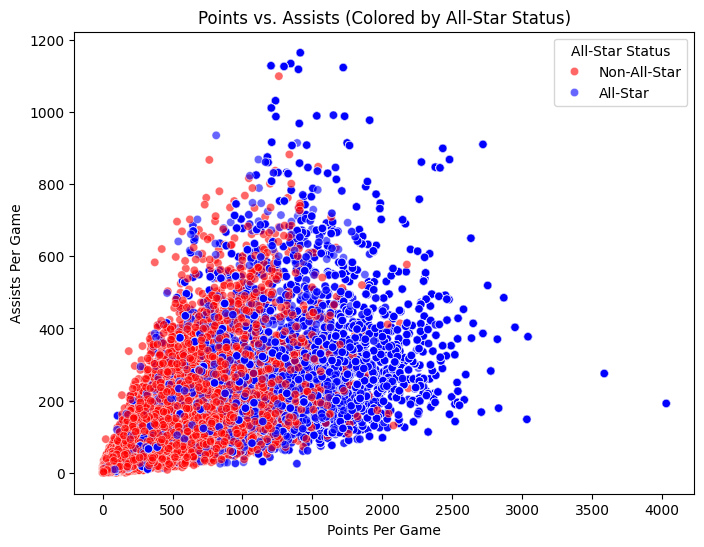

In [31]:
plt.figure(figsize=(8, 6))

# Define a color palette manually
palette = {0: "red", 1: "blue"}

sns.scatterplot(data=merged_df, x="pts_reg", y="asts_reg", hue="is_all_star", palette=palette, alpha=0.6)

plt.xlabel("Points Per Game")
plt.ylabel("Assists Per Game")
plt.title("Points vs. Assists (Colored by All-Star Status)")

# Fix legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Non-All-Star", "All-Star"], title="All-Star Status")

plt.show()
